In [14]:
# Import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [15]:
# Read Data

gdf = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/data/poland.municipalities.json")
population = pd.read_csv("C:/Users/alkaye/geodemographics-demonstrator/data/table21_population_utf8_manual_edit.csv")
population_by_age = pd.read_csv("C:/Users/alkaye/geodemographics-demonstrator/data/population_pct_by_age_by_muninciple.csv")

In [16]:
# Format

# Convert id to string
population['id'] = population['id'].apply(str)
population['id'] = population['id'].str.lstrip('0')

# Convert id to string
population_by_age['id'] = population_by_age['id'].apply(str)
population_by_age['id'] = population_by_age['id'].str.lstrip('0')

# Reanme gdf columns to match population
gdf = gdf.rename(columns={'terc': 'id',
                          'name': 'Muninciple'})
# gdf['id'] = gdf['id'].apply(str)
gdf['id'] = gdf['id'].str.lstrip('0')

population_by_age

,id,Muninciple,total,total_pct_male,total_pct_female,0-4_pct_total,0-4_pct_males,0-4_pct_females,5-9_pct_total,5-9_pct_males,...,70-74_pct_females,75-79_pct_total,75-79_pct_males,75-79_pct_females,80-84_pct_total,80-84_pct_males,80-84_pct_females,85 and more_pct_total,85_more_males,85_more_pct_females
0,201011,Bolesławiec,"37,055",0.465,0.535,0.037,0.019,0.018,0.043,0.021,...,0.111,0.074,0.030,0.044,0.044,0.016,0.028,0.026,0.008,0.018
1,201022,Bolesławiec,"15,267",0.501,0.499,0.044,0.025,0.019,0.065,0.035,...,0.058,0.047,0.022,0.026,0.022,0.009,0.013,0.013,0.005,0.009
2,201032,Gromadka,"5,003",0.499,0.501,0.041,0.020,0.020,0.052,0.026,...,0.080,0.063,0.030,0.033,0.029,0.011,0.018,0.017,0.005,0.012
3,201043,Nowogrodziec,"14,622",0.499,0.501,0.045,0.023,0.023,0.059,0.032,...,0.064,0.046,0.019,0.027,0.024,0.010,0.014,0.018,0.006,0.012
4,201052,Osiecznica,"7,284",0.504,0.496,0.045,0.025,0.020,0.057,0.027,...,0.058,0.045,0.019,0.026,0.024,0.011,0.013,0.011,0.004,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,3218043,Resko,"7,227",0.504,0.496,0.041,0.019,0.023,0.048,0.026,...,0.086,0.065,0.030,0.036,0.036,0.015,0.021,0.016,0.004,0.012
2473,3218053,Węgorzyno,"6,320",0.501,0.499,0.037,0.020,0.017,0.050,0.024,...,0.078,0.056,0.027,0.029,0.032,0.015,0.017,0.019,0.005,0.014
2474,3261011,Koszalin,"105,540",0.470,0.530,0.037,0.019,0.018,0.047,0.024,...,0.106,0.071,0.028,0.043,0.045,0.018,0.027,0.025,0.009,0.016
2475,3262011,Szczecin,"389,066",0.473,0.527,0.041,0.021,0.020,0.046,0.023,...,0.097,0.066,0.027,0.039,0.041,0.016,0.024,0.023,0.008,0.015


<Axes: >

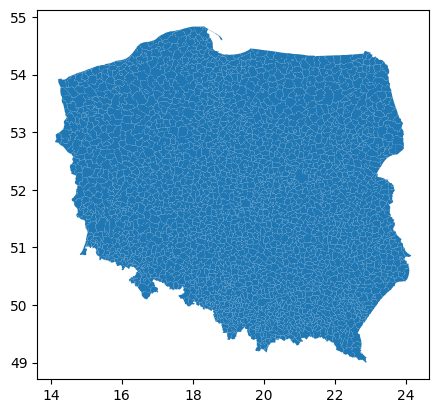

In [17]:
gdf.plot()

In [18]:
# Merge first on ID
gdf2 = gdf.merge(population, on='id', how='left')
gdf2

,id,Muninciple_x,geometry,Muninciple_y,Type,Area km2,Population,Population Density per km2
0,2602042,Nagłowice,"POLYGON ((20.07881 50.61226, 20.06867 50.62016...",Nagłowice,rural,117.0,4712.0,40.0
1,2602063,Sędziszów,"POLYGON ((19.94997 50.50478, 19.93508 50.50231...",Sędziszów,urban-rural,146.0,11849.0,81.0
2,2602012,Imielno,"POLYGON ((20.34121 50.54595, 20.34016 50.54625...",Imielno,rural,101.0,4159.0,41.0
3,2604012,Bieliny,"POLYGON ((20.8878 50.8231, 20.90509 50.83401, ...",Bieliny,rural,88.0,9984.0,113.0
4,2604112,Mniów,"POLYGON ((20.50742 50.95794, 20.4894 50.96963,...",Mniów,rural,95.0,9081.0,95.0
...,...,...,...,...,...,...,...,...
2472,2007043,Nowogród,"POLYGON ((21.8909 53.27554, 21.90474 53.27413,...",Nowogród,urban-rural,101.0,3880.0,38.0
2473,1416082,Stary Lubotyń,"POLYGON ((21.9761 52.97883, 22.00176 52.97233,...",Stary Lubotyń,rural,110.0,3593.0,33.0
2474,3017023,Nowe Skalmierzyce,"POLYGON ((18.08736 51.70619, 18.08005 51.69114...",Nowe Skalmierzyce,urban-rural,125.0,15986.0,127.0
2475,2202043,Czersk,"POLYGON ((18.12234 53.82687, 18.12262 53.82401...",Czersk,urban-rural,380.0,21282.0,56.0


In [19]:
# Get blanks - some of the IDs are wrong
blanks = gdf2[gdf2['Muninciple_y'].isna()]
blanks_list = blanks['Muninciple_x'].tolist()
blanks

,id,Muninciple_x,geometry,Muninciple_y,Type,Area km2,Population,Population Density per km2
8,2609032,Klimontów,"POLYGON ((21.39443 50.60876, 21.39218 50.64224...",NaN,NaN,NaN,NaN,NaN
35,3019032,Kaczory,"POLYGON ((16.80782 53.05305, 16.81241 53.06176...",NaN,NaN,NaN,NaN,NaN
60,2416092,Włodowice,"POLYGON ((19.38799 50.52121, 19.38264 50.53497...",NaN,NaN,NaN,NaN,NaN
168,602062,Goraj,"POLYGON ((22.64639 50.68981, 22.6425 50.69745,...",NaN,NaN,NaN,NaN,NaN
176,1419022,Bodzanów,"POLYGON ((19.96975 52.42548, 19.92276 52.44718...",NaN,NaN,NaN,NaN,NaN
218,1010082,Rozprza,"POLYGON ((19.67805 51.23698, 19.64619 51.2474,...",NaN,NaN,NaN,NaN,NaN
318,2606022,Iwaniska,"POLYGON ((21.35016 50.6835, 21.29239 50.69399,...",NaN,NaN,NaN,NaN,NaN
388,1018042,Lututów,"POLYGON ((18.48874 51.29665, 18.47546 51.30351...",NaN,NaN,NaN,NaN,NaN
450,1002032,Dąbrowice,"POLYGON ((19.03855 52.2993, 19.03636 52.31534,...",NaN,NaN,NaN,NaN,NaN
455,1434062,Jadów,"POLYGON ((21.50712 52.47677, 21.52645 52.48201...",NaN,NaN,NaN,NaN,NaN


In [20]:
len(blanks)

39

In [21]:
# Replace last '2' digit with '3' in string
blanks['id'] = blanks['id'].str.replace('2$','3',regex=True)

blanks_merged = blanks[['id', 'geometry']].merge(population, on='id', how='left')
blanks_merged

c:\Users\alkaye\.virtualenvs\geodemographics-demonstrator-Kx37PRoz\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,geometry,Muninciple,Type,Area km2,Population,Population Density per km2
0,2609033,"POLYGON ((21.39443 50.60876, 21.39218 50.64224...",Klimontów,urban-rural,100,7515,75
1,3019033,"POLYGON ((16.80782 53.05305, 16.81241 53.06176...",Kaczory,urban-rural,151,7465,50
2,2416093,"POLYGON ((19.38799 50.52121, 19.38264 50.53497...",Włodowice,urban-rural,77,5182,67
3,602063,"POLYGON ((22.64639 50.68981, 22.6425 50.69745,...",Goraj,urban-rural,68,3903,58
4,1419023,"POLYGON ((19.96975 52.42548, 19.92276 52.44718...",Bodzanów,urban-rural,136,7845,58
5,1010083,"POLYGON ((19.67805 51.23698, 19.64619 51.2474,...",Rozprza,urban-rural,163,12283,75
6,2606023,"POLYGON ((21.35016 50.6835, 21.29239 50.69399,...",Iwaniska,urban-rural,105,6151,59
7,1018043,"POLYGON ((18.48874 51.29665, 18.47546 51.30351...",Lututów,urban-rural,76,4609,61
8,1002033,"POLYGON ((19.03855 52.2993, 19.03636 52.31534,...",Dąbrowice,urban-rural,46,1811,39
9,1434063,"POLYGON ((21.50712 52.47677, 21.52645 52.48201...",Jadów,urban-rural,117,7094,61


In [22]:
# Merge all together

# Drop the blanks from gdf3
gdf3 = gdf2.dropna()
gdf3 = gdf3.drop(columns=['Muninciple_y'])
gdf3 = gdf3.rename(columns={'Muninciple_x': 'Muninciple'})

# Add in the blanks which are now merged
gdf4 = pd.concat([gdf3, blanks_merged]).reset_index(drop=True)

gdf4

,id,Muninciple,geometry,Type,Area km2,Population,Population Density per km2
0,2602042,Nagłowice,"POLYGON ((20.07881 50.61226, 20.06867 50.62016...",rural,117.0,4712.0,40.0
1,2602063,Sędziszów,"POLYGON ((19.94997 50.50478, 19.93508 50.50231...",urban-rural,146.0,11849.0,81.0
2,2602012,Imielno,"POLYGON ((20.34121 50.54595, 20.34016 50.54625...",rural,101.0,4159.0,41.0
3,2604012,Bieliny,"POLYGON ((20.8878 50.8231, 20.90509 50.83401, ...",rural,88.0,9984.0,113.0
4,2604112,Mniów,"POLYGON ((20.50742 50.95794, 20.4894 50.96963,...",rural,95.0,9081.0,95.0
...,...,...,...,...,...,...,...
2472,2604143,Piekoszów,"POLYGON ((20.30774 50.84229, 20.29683 50.85445...",urban-rural,103.0,16807.0,163.0
2473,3001023,Budzyń,"POLYGON ((16.92498 52.82216, 16.85666 52.85305...",urban-rural,209.0,8305.0,40.0
2474,1004063,Piątek,"POLYGON ((19.38043 52.00275, 19.36221 52.02284...",urban-rural,133.0,5609.0,42.0
2475,224033,Kamieniec Ząbkowicki,"POLYGON ((16.80349 50.4762, 16.80182 50.49143,...",urban-rural,96.0,7468.0,77.0


In [23]:
gdf5 = pd.merge(gdf4, population_by_age, on='id', how='left')

gdf5

,id,Muninciple_x,geometry,Type,Area km2,Population,Population Density per km2,Muninciple_y,total,total_pct_male,...,70-74_pct_females,75-79_pct_total,75-79_pct_males,75-79_pct_females,80-84_pct_total,80-84_pct_males,80-84_pct_females,85 and more_pct_total,85_more_males,85_more_pct_females
0,2602042,Nagłowice,"POLYGON ((20.07881 50.61226, 20.06867 50.62016...",rural,117.0,4712.0,40.0,Nagłowice,"4,689",0.499,...,0.088,0.063,0.027,0.035,0.041,0.018,0.023,0.019,0.006,0.012
1,2602063,Sędziszów,"POLYGON ((19.94997 50.50478, 19.93508 50.50231...",urban-rural,146.0,11849.0,81.0,Sędziszów,"11,720",0.495,...,0.085,0.071,0.032,0.039,0.037,0.018,0.019,0.019,0.006,0.013
2,2602012,Imielno,"POLYGON ((20.34121 50.54595, 20.34016 50.54625...",rural,101.0,4159.0,41.0,Imielno,"4,151",0.503,...,0.087,0.067,0.031,0.036,0.040,0.018,0.022,0.020,0.009,0.011
3,2604012,Bieliny,"POLYGON ((20.8878 50.8231, 20.90509 50.83401, ...",rural,88.0,9984.0,113.0,Bieliny,"9,962",0.499,...,0.060,0.041,0.018,0.023,0.023,0.011,0.013,0.017,0.006,0.011
4,2604112,Mniów,"POLYGON ((20.50742 50.95794, 20.4894 50.96963,...",rural,95.0,9081.0,95.0,Mniów,"9,044",0.490,...,0.065,0.043,0.020,0.023,0.027,0.012,0.015,0.013,0.004,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2604143,Piekoszów,"POLYGON ((20.30774 50.84229, 20.29683 50.85445...",urban-rural,103.0,16807.0,163.0,Piekoszów,"16,850",0.490,...,0.060,0.040,0.018,0.022,0.024,0.010,0.015,0.015,0.004,0.011
2473,3001023,Budzyń,"POLYGON ((16.92498 52.82216, 16.85666 52.85305...",urban-rural,209.0,8305.0,40.0,Budzyń,"8,290",0.504,...,0.063,0.045,0.019,0.026,0.028,0.011,0.017,0.012,0.004,0.008
2474,1004063,Piątek,"POLYGON ((19.38043 52.00275, 19.36221 52.02284...",urban-rural,133.0,5609.0,42.0,Piątek,"5,576",0.494,...,0.092,0.053,0.024,0.029,0.038,0.012,0.025,0.022,0.007,0.015
2475,224033,Kamieniec Ząbkowicki,"POLYGON ((16.80349 50.4762, 16.80182 50.49143,...",urban-rural,96.0,7468.0,77.0,Kamieniec Ząbkowicki,"7,411",0.491,...,0.080,0.068,0.031,0.037,0.035,0.014,0.022,0.014,0.005,0.009


<Axes: >

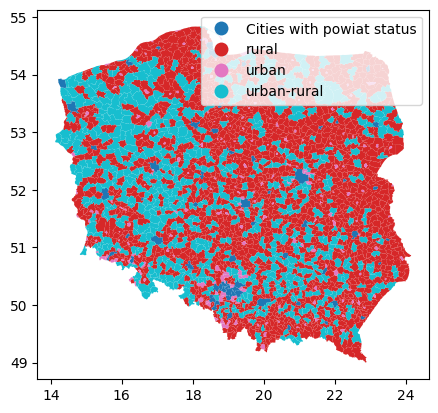

In [24]:
gdf5.plot(column='Type', legend=True)

<Axes: >

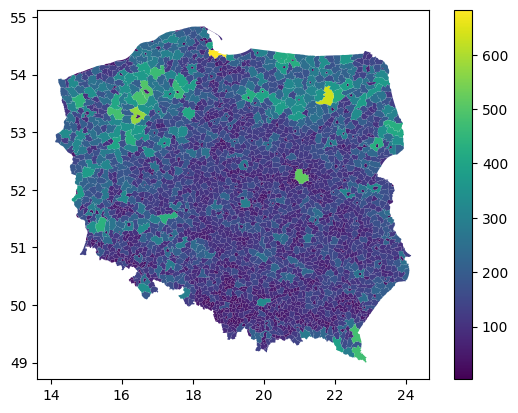

In [25]:
gdf5.plot(column='Area km2', legend=True)

<Axes: >

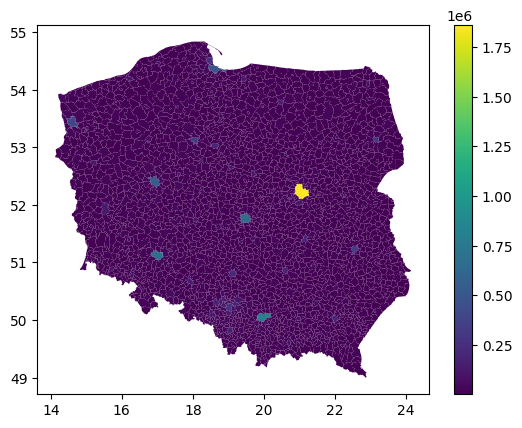

In [26]:
gdf5.plot(column='Population', legend=True)

<Axes: >

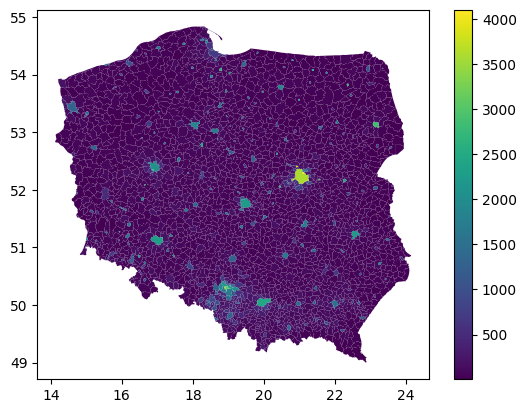

In [27]:
gdf5.plot(column='Population Density per km2', legend=True)

In [32]:
gdf5 = gdf5.drop(columns=['Muninciple_y']).rename(columns={'Muninciple_x': 'Municiple'})
gdf5

,id,Municiple,geometry,Type,Area km2,Population,Population Density per km2,total,total_pct_male,total_pct_female,...,70-74_pct_females,75-79_pct_total,75-79_pct_males,75-79_pct_females,80-84_pct_total,80-84_pct_males,80-84_pct_females,85 and more_pct_total,85_more_males,85_more_pct_females
0,2602042,Nagłowice,"POLYGON ((20.07881 50.61226, 20.06867 50.62016...",rural,117.0,4712.0,40.0,"4,689",0.499,0.501,...,0.088,0.063,0.027,0.035,0.041,0.018,0.023,0.019,0.006,0.012
1,2602063,Sędziszów,"POLYGON ((19.94997 50.50478, 19.93508 50.50231...",urban-rural,146.0,11849.0,81.0,"11,720",0.495,0.505,...,0.085,0.071,0.032,0.039,0.037,0.018,0.019,0.019,0.006,0.013
2,2602012,Imielno,"POLYGON ((20.34121 50.54595, 20.34016 50.54625...",rural,101.0,4159.0,41.0,"4,151",0.503,0.497,...,0.087,0.067,0.031,0.036,0.040,0.018,0.022,0.020,0.009,0.011
3,2604012,Bieliny,"POLYGON ((20.8878 50.8231, 20.90509 50.83401, ...",rural,88.0,9984.0,113.0,"9,962",0.499,0.501,...,0.060,0.041,0.018,0.023,0.023,0.011,0.013,0.017,0.006,0.011
4,2604112,Mniów,"POLYGON ((20.50742 50.95794, 20.4894 50.96963,...",rural,95.0,9081.0,95.0,"9,044",0.490,0.510,...,0.065,0.043,0.020,0.023,0.027,0.012,0.015,0.013,0.004,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2604143,Piekoszów,"POLYGON ((20.30774 50.84229, 20.29683 50.85445...",urban-rural,103.0,16807.0,163.0,"16,850",0.490,0.510,...,0.060,0.040,0.018,0.022,0.024,0.010,0.015,0.015,0.004,0.011
2473,3001023,Budzyń,"POLYGON ((16.92498 52.82216, 16.85666 52.85305...",urban-rural,209.0,8305.0,40.0,"8,290",0.504,0.496,...,0.063,0.045,0.019,0.026,0.028,0.011,0.017,0.012,0.004,0.008
2474,1004063,Piątek,"POLYGON ((19.38043 52.00275, 19.36221 52.02284...",urban-rural,133.0,5609.0,42.0,"5,576",0.494,0.506,...,0.092,0.053,0.024,0.029,0.038,0.012,0.025,0.022,0.007,0.015
2475,224033,Kamieniec Ząbkowicki,"POLYGON ((16.80349 50.4762, 16.80182 50.49143,...",urban-rural,96.0,7468.0,77.0,"7,411",0.491,0.509,...,0.080,0.068,0.031,0.037,0.035,0.014,0.022,0.014,0.005,0.009
